In [ ]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
# which is a derivative work from original NIST datasets. 
# MNIST dataset is made available under the terms of the 
# Creative Commons Attribution-Share Alike 3.0 license.

In [2]:
#@title Code that will set everything working for that exercise. It's good to have a look on it, though.
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

## The Dataset
  
This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.


**This is a multi-class classification problem with 10 output classes, one for each digit.**

Each example contains a pixel map showing how a person wrote a digit. For example, the following images shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after the input data is normalized). 

![Two images. The first image shows a somewhat fuzzy digit one. The second image shows a 14x14 floating-point array in which most of the cells contain 0 but a few cells contain values between 0.0 and 1.0. The pattern of nonzero values corresponds to the image of the fuzzy digit in the first image.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each example in the MNIST dataset consists of:

* A label; each label must be an integer from 0 to 9.  For example, in the preceding image, the label would be `1`.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

## Load the dataset

`tf.keras` provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

* Loads both the training set and the test set.
* Separates each set into features and labels.

The relevant convenience function for MNIST is called `mnist.load_data()`:

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Notice that `mnist.load_data()` returned four separate values:

* `x_train` contains the training set's features.
* `y_train` contains the training set's labels.
* `x_test` contains the test set's features.
* `y_test` contains the test set's labels.

**Note:** The MNIST .csv training set is already shuffled.

## View the dataset

The .csv that we use on the previous exercises (i.e. California Housing Dataset) contains column names (i.e. `latitude`, `longitude`, `population`). 

By contrast, the .csv file for MNIST does not contain column names. Instead of column names, you use ordinal numbers to access different subsets of the MNIST dataset. 

In fact, it is probably best to think of `x_train` and `x_test` as three-dimensional NumPy arrays:  



In [4]:
# Output example #2917 of the training set.
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0

Alternatively, you can call `matplotlib.pyplot.imshow` to interpret the preceding numeric array as an image. 

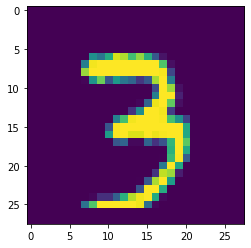

In [5]:
# Use false colors to visualize the array.
plt.imshow(x_train[2917])

In [6]:
# Output row #10 of example #2917.
x_train[2917][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [7]:
# Output pixel #16 of row #10 of example #2900.
x_train[2917][10][16]

58

## Task 1: Normalizing feature values

The following code cell map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. The floating-point values are stored in `x_train_normalized` and `x_test_normalized`.

In [20]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

## Create a deep neural net model

The `create_model` function defines the topography of the deep neural net, specifying the following:

* The number of layers in the deep neural net.
* The number of nodes in each layer.
* Any regularization layers.

The `create_model` function also defines the activation function of each layer.  The activation function of the output layer is softmax, which will yield 10 different outputs for each example. Each of the 10 outputs provides the probability that the input example is a certain digit.

In [21]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

## Task 2: Describe the deep neural network architecture.

Focus the discussions on each layer. Make use of summary() function for the parameter quantitative description. Discuss about hyperparameters of the layers and the chosen activation function.

Do not forget to describe the loss function and the metrics. Interpret those chosen options.



In [22]:
my_model = create_model(0.01)
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


A: As seen from the output of the previous cell, the model has a 'flatten' layer, and 2 'dense' layers. The flatten layer has no parameters it simply takes 2d image and converts to 1d (28x28 -> 784).
The 2 dense layers


1.   Dense layer 1 takes input of shape (None, 784) and outputs (None, 32). Thus, it has a weight matrix of 32x784, while bias is a vector of size 32 (lenght of outputs). Thus, the total parameters in this layer are 32 x 784 + 32 -> 25120.
2.   Dense layer 2 takes input of shape (None, 32) and outputs (None, 10). Thus, it has a weight matrix of 10 x 32, while bias is a vector of size 10 (lenght of outputs). Thus, the total parameters in this layer are 10 x 32 + 10 -> 330.

The loss function used is 'sparse_categorical_crossentropy' and the metrics are 'accuracy'. 




## Training the Deep Neural Network

Run the following code cell to invoke the preceding functions and actually train the model on the training set. 

**Note:** Due to several factors (e.g. more examples and a more complex neural network) training MNIST might take longer than training performed in the last exercises, on the California Housing Dataset. Be patient!

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 24ms/step - loss: 1.7053 - accuracy: 0.4610 - val_loss: 0.9550 - val_accuracy: 0.7653
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 0.8737 - accuracy: 0.7371 - val_loss: 0.5084 - val_accuracy: 0.8713
Epoch 3/50
12/12 [==============================] - 0s 12ms/step - loss: 0.6156 - accuracy: 0.8152 - val_loss: 0.3969 - val_accuracy: 0.8913
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.5088 - accuracy: 0.8494 - val_loss: 0.3431 - val_accuracy: 0.9044
Epoch 5/50
12/12 [==============================] - 0s 12ms/step - loss: 0.4555 - accuracy: 0.8664 - val_loss: 0.3124 - val_accuracy: 0.9140
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 0.4190 - accuracy: 0.8779 - val_loss: 0.2913 - val_accuracy: 0.9194
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 0.3959 - accuracy: 0.8845 - val_loss: 0.2765 - val_accuracy: 0.9235
Epoch 8/50
12/12 [======

[0.1387939751148224, 0.9587000012397766]

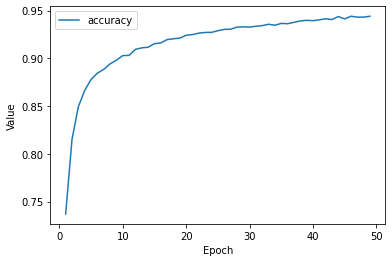

In [23]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

## Task 3: Optimize the model. Show some plots.

Experiment with the following:

* number of hidden layers 
* number of nodes in each layer
* dropout regularization rate

What trends did you discover? How your results looks? Make use of function `plot_curve(epochs, hist, list_of_metrics)`, defined at the very beginning. Can you reach 99% accuracy against the test set? 




In [29]:
def get_model1(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model  

In [30]:
def get_model2(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model  

In [31]:
def get_model3(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model  

In [46]:
def get_model4(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.3))
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model  

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 24ms/step - loss: 2.1234 - accuracy: 0.2826 - val_loss: 1.8215 - val_accuracy: 0.5538
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 1.6510 - accuracy: 0.5641 - val_loss: 1.3553 - val_accuracy: 0.7207
Epoch 3/50
12/12 [==============================] - 0s 13ms/step - loss: 1.2628 - accuracy: 0.6783 - val_loss: 0.9948 - val_accuracy: 0.7969
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.9885 - accuracy: 0.7403 - val_loss: 0.7653 - val_accuracy: 0.8398
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.8071 - accuracy: 0.7890 - val_loss: 0.6270 - val_accuracy: 0.8610
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 0.6961 - accuracy: 0.8142 - val_loss: 0.5421 - val_accuracy: 0.8757
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 0.6195 - accuracy: 0.8327 - val_loss: 0.4853 - val_accuracy: 0.8855
Epoch 8/50
12/12 [======

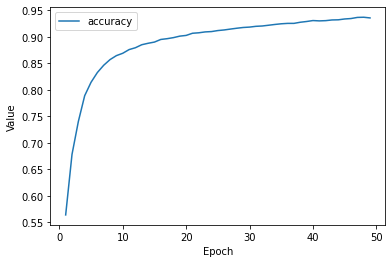


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 7ms/step - loss: 0.1861 - accuracy: 0.9456
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 28ms/step - loss: 2.1152 - accuracy: 0.2920 - val_loss: 1.7863 - val_accuracy: 0.6546
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 1.5901 - accuracy: 0.5801 - val_loss: 1.1472 - val_accuracy: 0.7642
Epoch 3/50
12/12 [==============================] - 0s 16ms/step - loss: 1.1243 - accuracy: 0.6802 - val_loss: 0.7258 - val_accuracy: 0.8357
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.8357 - accuracy: 0.7482 - val_loss: 0.5270 - val_accuracy: 0.8709
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.6689 - accuracy: 0.7997 - val_loss: 0.4246 - val_accuracy: 0.8926
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 0.5670 - accuracy: 0.8324 - val_loss: 0.3659 - val_accuracy: 0.9049
Epoch 7/50
12/12 [==============================] - 0s 12ms/step - loss: 0.5019 - accuracy: 0.8519 - val_loss: 0.3294 - val_accuracy: 0.9136
Epoch 8/50
12/12 [======

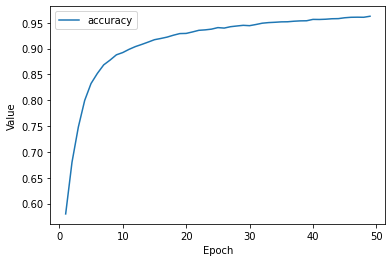


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 10ms/step - loss: 0.1050 - accuracy: 0.9692
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 27ms/step - loss: 2.0766 - accuracy: 0.3097 - val_loss: 1.6077 - val_accuracy: 0.6474
Epoch 2/50
12/12 [==============================] - 0s 13ms/step - loss: 1.4399 - accuracy: 0.5706 - val_loss: 0.8597 - val_accuracy: 0.7985
Epoch 3/50
12/12 [==============================] - 0s 13ms/step - loss: 0.9489 - accuracy: 0.7078 - val_loss: 0.5085 - val_accuracy: 0.8728
Epoch 4/50
12/12 [==============================] - 0s 17ms/step - loss: 0.6822 - accuracy: 0.7893 - val_loss: 0.3819 - val_accuracy: 0.8955
Epoch 5/50
12/12 [==============================] - 0s 15ms/step - loss: 0.5414 - accuracy: 0.8373 - val_loss: 0.3124 - val_accuracy: 0.9138
Epoch 6/50
12/12 [==============================] - 0s 13ms/step - loss: 0.4537 - accuracy: 0.8653 - val_loss: 0.2695 - val_accuracy: 0.9212
Epoch 7/50
12/12 [==============================] - 0s 15ms/step - loss: 0.3972 - accuracy: 0.8830 - val_loss: 0.2440 - val_accuracy: 0.9282
Epoch 8/50
12/12 [======

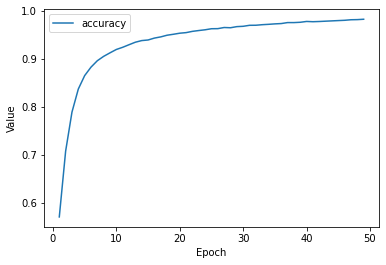


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 8ms/step - loss: 0.0740 - accuracy: 0.9778
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 28ms/step - loss: 2.2744 - accuracy: 0.1700 - val_loss: 2.0345 - val_accuracy: 0.6417
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 1.9624 - accuracy: 0.3183 - val_loss: 1.4888 - val_accuracy: 0.6612
Epoch 3/50
12/12 [==============================] - 0s 16ms/step - loss: 1.6275 - accuracy: 0.4412 - val_loss: 1.0339 - val_accuracy: 0.7829
Epoch 4/50
12/12 [==============================] - 0s 17ms/step - loss: 1.3347 - accuracy: 0.5431 - val_loss: 0.7708 - val_accuracy: 0.8350
Epoch 5/50
12/12 [==============================] - 0s 13ms/step - loss: 1.1062 - accuracy: 0.6251 - val_loss: 0.5993 - val_accuracy: 0.8663
Epoch 6/50
12/12 [==============================] - 0s 13ms/step - loss: 0.9388 - accuracy: 0.6880 - val_loss: 0.4780 - val_accuracy: 0.8884
Epoch 7/50
12/12 [==============================] - 0s 15ms/step - loss: 0.8139 - accuracy: 0.7383 - val_loss: 0.3989 - val_accuracy: 0.9013
Epoch 8/50
12/12 [======

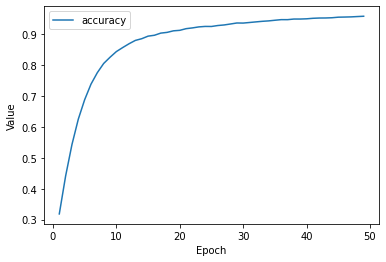


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 8ms/step - loss: 0.1051 - accuracy: 0.9701


In [41]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

models = [get_model1, get_model2, get_model3, get_model4]
for i in range(len(models)):
  my_model = models[i](learning_rate)
  epochs_list, hist = train_model(my_model, x_train_normalized, y_train, 
                            epochs, batch_size, validation_split)
  list_of_metrics_to_plot = ['accuracy']
  plot_curve(epochs_list, hist, list_of_metrics_to_plot)
  plt.show()
  print("\n Evaluate the new model against the test set:")
  my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

In [59]:
epochs = 100
learning_rate = 0.003

In [112]:
def get_model4(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
  model.add(tf.keras.layers.Dense(units=512, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model  

In [113]:
learning_rate

0.003

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 32ms/step - loss: 1.4508 - accuracy: 0.5047 - val_loss: 0.4631 - val_accuracy: 0.8638
Epoch 2/100
12/12 [==============================] - 0s 18ms/step - loss: 0.5670 - accuracy: 0.8257 - val_loss: 0.2662 - val_accuracy: 0.9222
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.3647 - accuracy: 0.8974 - val_loss: 0.2010 - val_accuracy: 0.9424
Epoch 4/100
12/12 [==============================] - 0s 14ms/step - loss: 0.2768 - accuracy: 0.9237 - val_loss: 0.1637 - val_accuracy: 0.9537
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 0.2248 - accuracy: 0.9388 - val_loss: 0.1405 - val_accuracy: 0.9596
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 0.1822 - accuracy: 0.9494 - val_loss: 0.1258 - val_accuracy: 0.9630
Epoch 7/100
12/12 [==============================] - 0s 14ms/step - loss: 0.1585 - accuracy: 0.9559 - val_loss: 0.1150 - val_accuracy: 0.9663
Epoch 8/100
12/12 

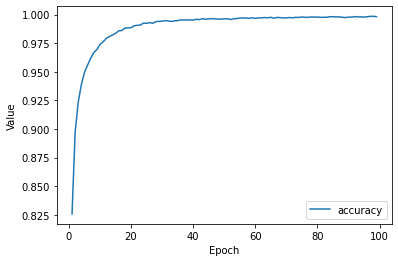


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 8ms/step - loss: 0.1190 - accuracy: 0.9830


[0.11903712153434753, 0.9829999804496765]

In [114]:
my_model = get_model4(learning_rate)
epochs_list, hist = train_model(my_model, x_train_normalized, y_train, 
                          epochs, batch_size, validation_split)
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs_list, hist, list_of_metrics_to_plot)
plt.show()
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)